In [1]:
import logging

import numpy as np
from numba import njit
import matplotlib.pyplot as plt
%matplotlib inline
logging.getLogger().setLevel(logging.INFO)


In [9]:
from tests.black_scholes.run_test import run_blackScholes_simulation
from tests.black_scholes import BlackScholesInfo, BoundaryConditions, Basis, bs_logger
from tests.black_scholes.hamiltonian import generateBlackScholesHamiltonian
from tests.black_scholes.option_models import EuropeanCallFormula, EuropeanPutFormula, EuropeanCallState, EuropeanPutState

bs_data = BlackScholesInfo(r:=0.04,q:=0,sigma:=0.2,
                           basis:=Basis.S,Smin:=0,Smax:=150,
                           BC:=BoundaryConditions.DOUBLE_LINEAR)

strike = 50
n = 4
N=2**n
T = 3
Nt = 100
dt = T/Nt

PUT = True

if PUT:
    VT = EuropeanPutState(Smin,Smax,strike,n)
    analytical_sol = np.array([[EuropeanPutFormula(S,tau,strike,r,sigma) for S in np.linspace(Smin,Smax,N)] for tau in np.linspace(0.0,T,Nt+1)])
else:
    VT = EuropeanCallState(Smin,Smax,strike,n)
    analytical_sol = np.array([[EuropeanCallFormula(S,tau,strike,r,sigma) for S in np.linspace(Smin,Smax,N)] for tau in np.linspace(0.0,T,Nt+1)])

qnute_sols, qnute_norms = run_blackScholes_simulation(VT, bs_data, n, np.arange(2,n+2,2), T, Nt)

INFO:QNUTE Logger:Performing initial measurements...
INFO:QNUTE Logger:Starting QNUTE Iterations:
INFO:QNUTE Logger:    Iteration 001
INFO:QNUTE Logger:      Finished in 0.06 seconds.
INFO:QNUTE Logger:    Iteration 100
INFO:QNUTE Logger:      Finished in 0.01 seconds.
INFO:QNUTE Logger:Performing initial measurements...
INFO:QNUTE Logger:Starting QNUTE Iterations:
INFO:QNUTE Logger:    Iteration 001
INFO:QNUTE Logger:      Finished in 0.06 seconds.
INFO:QNUTE Logger:    Iteration 100
INFO:QNUTE Logger:      Finished in 0.06 seconds.


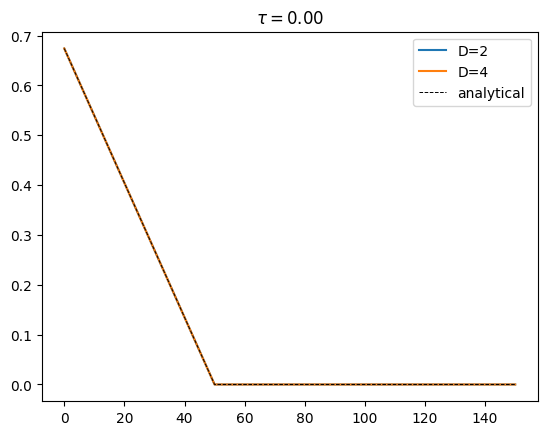

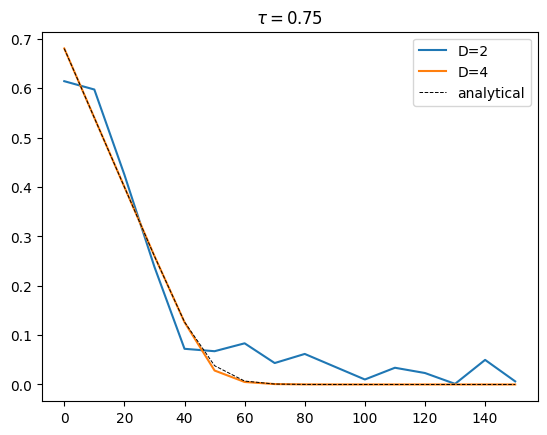

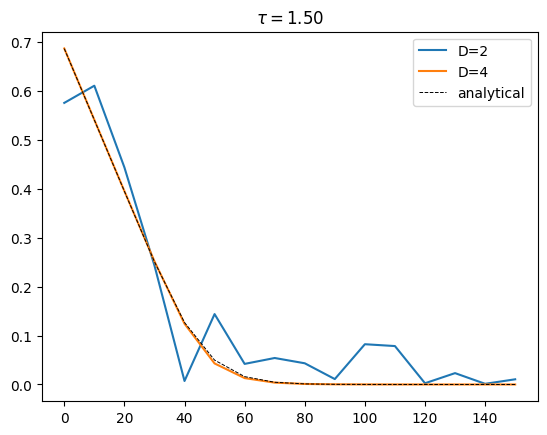

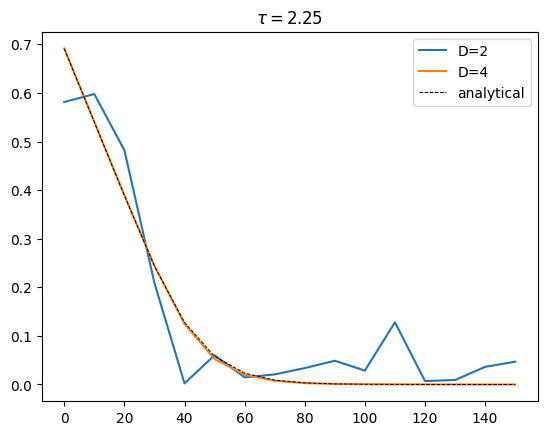

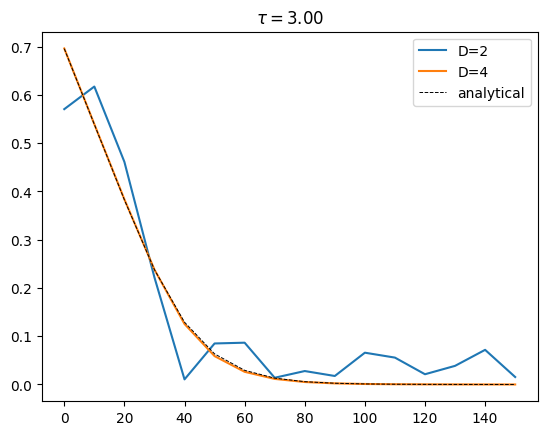

In [11]:
for ti in np.arange(0,Nt+1,25):
    for Di,D in enumerate([2,4]):
        plt.plot(x:=np.linspace(Smin,Smax,N),qnute_sols[Di,ti,:],label=f'{D=}')
    plt.plot(x,analytical_sol[ti,:]/np.linalg.norm(analytical_sol[ti,:]),label='analytical',linestyle='dashed',color='black',linewidth=0.7)
    plt.legend()
    plt.title(f'$\\tau = {ti*dt:0.2f}$')
    plt.show()

In [ ]:
def rescale_qnute_bs_sols(f0:np.array[float], bs_data:BlackScholesInfo,
                          qnute_sols:np.ndarray[float],
                          Nt, T):
    if f0[0] == 0.0 and f0[-1] == 0.0:
        raise ValueError('Initial state must be non-zero on at least one boundary to rescale with linear boundary conditions')
    
    N = f0.shape[0]
    dS = (bs_data.Smax - bs_data.Smin)/(N-1)

    if left_flag:=(f0[0] != 0.0):
        a0l = (f0[1] - f0[0])/dS
        b0l = f0[0] - bs_data.Smin*a0l

        al = a0l * np.exp(-(bs_data.q/bs_data.Smin)*np.linspace(0,T,Nt+1))
        bl = b0l * np.exp(-bs_data.r*np.linspace(0,T,Nt+1))

        C_star
    if right_flag:=(f0[-1] != 0.0):
        a0r = (f0[-1] - f0[-2])/dS
        b0r = f0[-1] - bs_data.Smax*a0r
        ar = a0r * np.exp(-(bs_data.q/bs_data.Smin)*np.linspace(0,T,Nt+1))
        br = b0r * np.exp(-bs_data.r*np.linspace(0,T,Nt+1))
    
    


In [ ]:
# from tests.black_scholes.hamiltonian import generateBlackScholesHamiltonian
from qnute.hamiltonian import Hamiltonian
from tests.black_scholes import BlackScholesInfo, Basis, BoundaryConditions
from qnute.hamiltonian.examples.position_operator import generatePositionHamiltonian
from qnute.hamiltonian.examples.finite_difference.first_derivative import generateFirstDerivativeHamiltonian1D
from qnute.hamiltonian.examples.finite_difference.laplacian import generateLaplaceHamiltonian1D

from qnute.hamiltonian import hm_list_tensor
from qnute.hamiltonian.construction import get_lowerLeft_hm_list, get_lowerRight_hm_list, get_upperLeft_hm_list, get_upperRight_hm_list

def lowerRightHam(num_qbits:int) -> Hamiltonian:
    return Hamiltonian(get_lowerRight_hm_list(num_qbits), num_qbits)
def lowerRight1Ham(num_qbits:int) -> Hamiltonian:
    assert num_qbits >= 2
    return Hamiltonian(hm_list_tensor(get_lowerRight_hm_list(num_qbits-1), 
                                      get_lowerLeft_hm_list(1) ), num_qbits)
def lowerRight2Ham(num_qbits:int) -> Hamiltonian:
    assert num_qbits >=2
    if num_qbits == 2:
        return Hamiltonian(hm_list_tensor(get_lowerLeft_hm_list(1),
                                          get_lowerRight_hm_list(1) ), num_qbits)
    return Hamiltonian(hm_list_tensor(get_lowerRight_hm_list(num_qbits-2),
                                      hm_list_tensor(get_lowerLeft_hm_list(1),
                                                     get_lowerRight_hm_list(1)) ), num_qbits)
def upperLeftHam(num_qbits:int)->Hamiltonian:
    return Hamiltonian(get_upperLeft_hm_list(num_qbits), num_qbits)
def upperLeft1Ham(num_qbits:int)->Hamiltonian:
    assert num_qbits >= 2
    if num_qbits == 2:
        return Hamiltonian(hm_list_tensor(get_upperLeft_hm_list(1), 
                                          get_upperRight_hm_list(1)), num_qbits)
    return Hamiltonian(hm_list_tensor(get_upperLeft_hm_list(num_qbits-1),
                                      get_upperRight_hm_list(1)), num_qbits)


def generateBlackScholesHamiltonian(bs_data:BlackScholesInfo,
                                    num_qbits:int
                                    )->Hamiltonian:
    assert num_qbits >= 2, 'Black Scholes Hamiltonian requries at least two qubits!'
    N = 2**num_qbits
    dS = (bs_data.Smax-bs_data.Smin) / (N-1)

    if bs_data.basis == Basis.S:
        BSHam = (
            (SHam:=generatePositionHamiltonian(num_qbits, bs_data.Smin, dS)) * generateFirstDerivativeHamiltonian1D(num_qbits, dS) * -(bs_data.r-bs_data.q) 
            + SHam*SHam*generateLaplaceHamiltonian1D(num_qbits, dS)*(-(bs_data.sigma**2)/2) 
            + Hamiltonian.Identity(num_qbits)*(bs_data.r)
            )
        
        match bs_data.BC:
            case BoundaryConditions.ZERO_AFTER:
                pass
            case BoundaryConditions.DIRICHLET_NODE:
                BC_Ham = lowerRightHam(num_qbits) * -(bs_data.r + (bs_data.sigma*bs_data.Smax/dS)**2)
                BC_Ham += lowerRight1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2 / 2 - (bs_data.r-bs_data.q)*bs_data.Smax/(2*dS))
                BSHam += BC_Ham
            case BoundaryConditions.LINEAR:
                BC_Ham = lowerRightHam(num_qbits) * -((bs_data.sigma*bs_data.Smax/dS)**2 + (bs_data.r-bs_data.q)*bs_data.Smax/dS)
                BC_Ham += lowerRight1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2 / 2 + (bs_data.r-bs_data.q)*bs_data.Smax/(2*dS))
                BSHam += BC_Ham
            case BoundaryConditions.PDE:
                BC_Ham = lowerRightHam(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2*(-5/2) - (bs_data.r-bs_data.q)*bs_data.Smax/dS)
                BC_Ham += lowerRight1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2 *(3/2) + (bs_data.r-bs_data.q)*bs_data.Smax/(2*dS))
                BC_Ham += lowerRight2Ham(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2/2)
                BSHam += BC_Ham
            case BoundaryConditions.DOUBLE_DIRICHLET_NODE:
                BC_Ham = lowerRightHam(num_qbits) * -(bs_data.r + (bs_data.sigma*bs_data.Smax/dS)**2)
                BC_Ham += lowerRight1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2 / 2 - (bs_data.r-bs_data.q)*bs_data.Smax/(2*dS))
                BC_Ham += upperLeftHam(num_qbits) * -(bs_data.r + (bs_data.sigma*bs_data.Smin/dS)**2)
                BC_Ham += upperLeft1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smin/dS)**2/2 + (bs_data.r-bs_data.q)*bs_data.Smin/(2*dS))
                BSHam += BC_Ham
            case BoundaryConditions.DOUBLE_LINEAR:
                BC_Ham = lowerRightHam(num_qbits) * -((bs_data.sigma*bs_data.Smax/dS)**2 + (bs_data.r-bs_data.q)*bs_data.Smax/dS)
                BC_Ham += lowerRight1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smax/dS)**2 / 2 + (bs_data.r-bs_data.q)*bs_data.Smax/(2*dS))
                BC_Ham += upperLeftHam(num_qbits) * (-(bs_data.sigma*bs_data.Smin/dS)**2 + (bs_data.r-bs_data.q)*bs_data.Smin/dS)
                BC_Ham += upperLeft1Ham(num_qbits) * ((bs_data.sigma*bs_data.Smin/dS)**2/2 - (bs_data.r-bs_data.q)*bs_data.Smin/dS)
                BSHam += BC_Ham
            case _:
                raise NotImplementedError('These boundary conditions are not yet implemented!')
    else:
        raise NotImplementedError('x-Basis hamiltonian not implemented yet!') 
    
    return BSHam


BSHams = [None] * len(BoundaryConditions)

for i,BC in enumerate(BoundaryConditions):
    # if BC not in [BoundaryConditions.ZERO_AFTER, BoundaryConditions.DIRICHLET_NODE, BoundaryConditions.DOUBLE_DIRICHLET_NODE]:
    #     continue
    bs_data = BlackScholesInfo(r:=0.04, q:=0, sigma:=0.2, basis:=Basis.S,
                               Smin:=20, Smax:=150, BC)
    BSHams[i] = generateBlackScholesHamiltonian(bs_data, n:=4)
    N = 2**n
    dS = (Smax-Smin)/(N-1)

    mmax = r+(sigma*(N-1))**2

    # print(f'Boundary Conditions: {BC.name}')
    # print(f'  |max| = {np.max(np.abs(BSHams[i].get_matrix().real))}')
    # print(f'  {r+(sigma*(N-1))**2}')
    # print(f'  |min| = {np.min(np.abs(BSHam.get_matrix().real))}')
    # print('  spectrum:\n    ',BSHams[i].get_spectrum()[0])
    # print('Eigenvalues:', np.linalg.eig(BSHams[i].get_matrix().real)[0])
    # print('  matrix:\n', BSHam.get_matrix().real)

    # plt.imshow(np.where(np.abs(BSHam.get_matrix().real) > mmax, 1.0, -1.0), vmin=-1.0,vmax=1.0)
    plt.imshow(BSHams[i].get_matrix().real)
    plt.colorbar()
    plt.title(f'Boundary Conditions: {BC.name}')
    plt.show()

In [ ]:
BCs = [BoundaryConditions.DOUBLE_DIRICHLET_NODE, BoundaryConditions.DOUBLE_LINEAR]

In [ ]:
def EuropeanPutState(Smin:float, Smax:float, strike:float, num_qbits:int) -> np.ndarray[float]:
    N = 2**num_qbits
    V = np.where((S:=np.linspace(Smin,Smax,N)) < strike, strike - S, 0.0)
    return V

def EuropeanCallState(Smin:float, Smax:float, strike:float, num_qbits:int) -> np.ndarray[float]:
    N = 2**num_qbits
    V = np.where((S:=np.linspace(Smin,Smax,N)) > strike, S-strike, 0.0)
    return V

Vput = EuropeanPutState(Smin,Smax, K:=50, n)
Vcal = EuropeanCallState(Smin,Smax,K,n)
N=2**n
plt.plot(x:=np.linspace(Smin,Smax,N), Vput, marker='*',label='Put')
plt.plot(x, Vcal, marker='o',label='Call')
plt.axvline(x=K,linestyle='dashed', label='Strike Price',color='g',linewidth=1.0)
plt.legend()
plt.xticks(np.arange(Smin,Smax+10,10),minor=True)
plt.grid(True,which='both')
plt.show()

# QNUTE Simulations

In [ ]:
from qnute.simulation.numerical_sim import qnute, qnute_logger
from qnute.simulation.parameters import QNUTE_params as Params
qnute_logger.setLevel(logging.INFO)

T = 3
Nt = 1000
dt = T/Nt

psiPut = Vput / (cPut:=np.linalg.norm(Vput))
psiCal = Vcal / (cCal:=np.linalg.norm(Vcal))

solutionsPut = np.zeros((len(BCs), Nt+1, N),np.float64)
solutionsCal = np.zeros((len(BCs), Nt+1, N),np.float64)

for i,BC in enumerate(BCs):
    H = BSHams[BC.value]
    logging.info('Running Boundary conditions: %s', BC.name)
    
    params = Params(H*(-1), 1, n)
    params.load_hamiltonian_params(4,[[0,1,2,3]],True,True)
    params.set_run_params(dt, 0.1, Nt, 0, None, init_sv=psiCal, trotter_flag=True)
    logging.info('  Running Call Options')
    out = qnute(params, log_frequency=500, c0 = cCal)
    solutionsCal[i,:,:] = out.svs.real
    for ti in range(Nt+1):
        solutionsCal[i,ti,:] *= np.prod(out.c_list[0:ti+1])
    
    params.set_run_params(dt, 0.1, Nt, 0, None, init_sv=psiPut, trotter_flag=True)
    logging.info('  Running Put Options')
    out = qnute(params, log_frequency=500, c0 = cPut)
    solutionsPut[i,:,:] = out.svs.real
    for ti in range(Nt+1):
        solutionsPut[i,ti,:] *= np.prod(out.c_list[0:ti+1])


In [ ]:
from scipy.stats import norm

def C(S,t):
    d_plus = (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d_minus = d_plus - (sigma*np.sqrt(T-t))
    
    return norm.cdf(d_plus)*S - norm.cdf(d_minus) * K * np.exp(-r*(T-t))

def P(S,t):
    return K*np.exp(-r*(T-t)) - S + C(S,t)

CSolsAnalytical = np.zeros((Nt+1,N))
CSolsAnalytical[Nt,:] = Vcal
for ti in range(Nt):
    for Si,S in enumerate(np.linspace(Smin,Smax,N)):
        CSolsAnalytical[ti,Si] = C(S, ti*dt)

PSolsAnalytical = np.zeros((Nt+1,N))
PSolsAnalytical[Nt,:] = Vput
for ti in range(Nt):
    for Si,S in enumerate(np.linspace(Smin,Smax,N)):
        PSolsAnalytical[ti,Si] = P(S, ti*dt)

In [ ]:
for ti in range(0,Nt+1,100):
    fig,axs = plt.subplots(2,1,sharex=True)
    for i,BC in enumerate(BCs):
        axs[0].plot(x,np.abs((sol:=solutionsPut[i,ti,:]))/np.linalg.norm(sol), label=BCs[i].name)
        axs[1].plot(x,np.abs((sol:=solutionsCal[i,ti,:])/np.linalg.norm(sol)), label=BCs[i].name)
    axs[0].plot(x,(sol:=PSolsAnalytical[Nt-ti,:])/np.linalg.norm(sol),label='Analytical', linestyle='dashed',color='k')
    axs[1].plot(x,(sol:=CSolsAnalytical[Nt-ti,:])/np.linalg.norm(sol),label='Analytical', linestyle='dashed',color='k')
    axs[0].axvline(x=K,linestyle='dashed',color='black',linewidth=0.5,label='Strike Price')
    axs[1].axvline(x=K,linestyle='dashed',color='black',linewidth=0.5)
    axs[0].legend()
    fig.suptitle(f'Normalised Solutions at t={ti*dt}')
    axs[0].set_title('Put Options')
    axs[1].set_title('Call Options')
    plt.show()

In [ ]:
cmap = plt.get_cmap('coolwarm')

fig,axs = plt.subplots(2,1,sharex=True,figsize=(10,6))
axs[0].set_title('Put Options')
axs[1].set_title('Call Options')
for ti,t in list(enumerate(np.linspace(0.0,T,Nt+1)))[::100]:
    l, = axs[0].plot(x, PSolsAnalytical[ti,:], label=f'$\\tau={T-t:0.1f}$', color=cmap(t/T))
    axs[1].plot(x, CSolsAnalytical[ti,:], color=l.get_color())
fig.legend(loc='center right')
plt.show()

In [ ]:
a0 = (CSolsAnalytical[0,-1] - CSolsAnalytical[0,-2]) / dS
b0 = CSolsAnalytical[0,-1] - Smax*a0

print(c:=CSolsAnalytical[::100,-1][::-1])

a = np.zeros(c.shape[0])
b = np.zeros(c.shape[0])

for ti,t in enumerate(list((np.linspace(0.0,T,Nt+1)))[::100]):
    a[ti] = 1.0
    b[ti] = b0*np.exp(r*t)

print((a*Smax + b)[::-1])

In [ ]:
fidelity = np.zeros((2,len(BCs),Nt+1))
lognormratio = np.zeros((2,len(BCs),Nt+1))
for i,BC in enumerate(BCs):
    for ti,t in enumerate(np.linspace(0.0,T,Nt+1)):
        fidelity[0,i,ti] = np.dot( np.abs(solutionsPut[i,ti,:]/np.linalg.norm(solutionsPut[i,ti,:])), PSolsAnalytical[ti,:]/np.linalg.norm(PSolsAnalytical[ti,:]) )
        fidelity[1,i,ti] = np.dot( np.abs(solutionsCal[i,ti,:]/np.linalg.norm(solutionsCal[i,ti,:])), CSolsAnalytical[ti,:]/np.linalg.norm(CSolsAnalytical[ti,:]) )
        lognormratio[0,i,ti] = np.log10( np.linalg.norm(solutionsPut[i,ti,:]) / np.linalg.norm(PSolsAnalytical[i,:]) )
        lognormratio[1,i,ti] = np.log10( np.linalg.norm(solutionsCal[i,ti,:]) / np.linalg.norm(CSolsAnalytical[i,:]) )


fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,4))
for i,BC in enumerate(BCs):
    for j in range(2):
        axs[j].plot(t:=np.linspace(0.0,T,Nt+1),fidelity[j,i,:], label=BC.name)
fig.suptitle('Fidelity')
axs[0].set_title('Put Options')
axs[1].set_title('Call Options')
axs[0].legend()
plt.show()

fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,4))
for i,BC in enumerate(BCs):
    for j in range(2):
        axs[j].plot(t:=np.linspace(0.0,T,Nt+1),lognormratio[j,i,:], label=BC.name)
fig.suptitle('Log Norm Ratio')
axs[0].set_title('Put Options')
axs[1].set_title('Call Options')
axs[0].legend()
plt.show()

# Rescaling The Unit Solutions

In [ ]:
dS

In [ ]:
def get_ab(V0, Smin,Smax,dS, Nt, T):
    a0_right = (V0[-1] - V0[-2])/dS
    b0_right = V0[-1] - Smax*a0_right

    a0_left = (V0[1] - V0[0])/dS
    b0_left = V0[0] - Smin*a0_left

    ar = np.zeros(Nt+1)
    br = np.zeros(Nt+1)
    al = np.zeros(Nt+1)
    bl = np.zeros(Nt+1)

    ar = a0_right * np.exp(-(q/Smax)*(T-np.linspace(T,0,Nt+1)))
    br = b0_right * np.exp(-r*(T-np.linspace(T,0,Nt+1)))

    al = a0_left * np.exp(-(q/Smax)*(T-np.linspace(T,0,Nt+1)))
    bl = b0_left * np.exp(-r*(T-np.linspace(T,0,Nt+1)))

    return ar,br,al,bl


V = Vcal
ar,br,al,bl = get_ab(V, Smin, Smax,dS, Nt, T)

plt.plot(x,V)
plt.show()

# plt.plot(np.linspace(0.0,T,Nt+1), ar, label='$a_r$')
# plt.plot(np.linspace(0.0,T,Nt+1), br, label='$b_r$')
# plt.plot(np.linspace(0.0,T,Nt+1), al, label='$a_l$')
# plt.plot(np.linspace(0.0,T,Nt+1), bl, label='$b_l$')
plt.plot(np.linspace(0.0,T,Nt+1), fl:=(al*Smin + bl), label='$f_0^t$ reconstructed')
plt.plot(np.linspace(0.0,T,Nt+1), CSolsAnalytical[::-1,0], label='$f_0^t$ analytical',linestyle='--')
plt.plot(np.linspace(0.0,T,Nt+1), fr:=(ar*Smax + br), label='$f_N^t$ reconstructed')
plt.plot(np.linspace(0.0,T,Nt+1), CSolsAnalytical[::-1,-1], label='$f_N^t$ analytical',linestyle='--')
plt.xlabel(r'$\tau$')
plt.legend()
plt.show()


In [ ]:
pNormSols = np.abs(solutionsPut.copy())/np.linalg.norm(solutionsPut,axis=2,keepdims=True)
cNormSols = np.abs(solutionsCal.copy())/np.linalg.norm(solutionsCal,axis=2,keepdims=True)

# VPL = PSolsAnalytical[::-1,0]
# VPR = PSolsAnalytical[::-1,-1]
# VCL = CSolsAnalytical[::-1,0]
# VCR = CSolsAnalytical[::-1,-1]

(Par,Pbr,Pal,Pbl) = get_ab(Vput, Smin,Smax,dS, Nt, T)
(Car,Cbr,Cal,Cbl) = get_ab(Vcal, Smin,Smax,dS, Nt, T)

VPR = Smax*Par + Pbr
VPL = Smin*Pal + Pbl
VCR = Smax*Car + Cbr
VCL = Smin*Cal + Cbl

for ti in range(0,Nt+1,100):
    fig,axs = plt.subplots(2,1,sharex=True)
    for i,BC in enumerate(BCs):
        if BC == BoundaryConditions.DOUBLE_DIRICHLET_NODE:
            continue
        axs[0].plot(x,pNormSols[i,ti,:]*(VPR[ti]/pNormSols[i,ti,-1]), label=f'right reconstruction')
        axs[0].plot(x,pNormSols[i,ti,:]*(VPL[ti]/pNormSols[i,ti,0]), label=f'left reconstruction')
        axs[1].plot(x,cNormSols[i,ti,:]*(VCR[ti]/cNormSols[i,ti,-1]), label=f'right reconstruction')
        axs[1].plot(x,cNormSols[i,ti,:]*(VCL[ti]/cNormSols[i,ti,0]), label=f'left reconstruction')
    axs[0].plot(x,(sol:=PSolsAnalytical[Nt-ti,:]),label='Analytical', linestyle='dashed',color='k')
    axs[1].plot(x,(sol:=CSolsAnalytical[Nt-ti,:]),label='Analytical', linestyle='dashed',color='k')
    axs[0].axvline(x=K,linestyle='dashed',color='black',linewidth=0.5,label='Strike Price')
    axs[1].axvline(x=K,linestyle='dashed',color='black',linewidth=0.5)
    axs[0].legend()
    fig.suptitle(f'Rescaled Solutions at $\\tau={ti*dt}$')
    axs[0].set_title('Put Options')
    axs[1].set_title('Call Options')
    plt.show()

In [ ]:
pNormSols.shape

In [ ]:
cRescaledSols = np.zeros((Nt+1,N))
pRescaledSols = np.zeros((Nt+1,N))
for ti in range(Nt+1):
    pRescaledSols[ti,:] = pNormSols[1,ti,:]*(VPL[ti]/pNormSols[i,ti,0])
    cRescaledSols[ti,:] = cNormSols[1,ti,:]*(VCR[ti]/cNormSols[i,ti,-1])

tskip=10
plotTimes = np.linspace(0.0,T,Nt+1)[::tskip]
plotStocks = np.linspace(Smin,Smax,N)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# Make data.
xlen = len(plotStocks)
ylen = len(plotTimes)
X, Y = np.meshgrid(plotStocks, plotTimes)
Z = cRescaledSols[::tskip,:]

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
# colortuple = ('y', 'b')
# colors = np.empty(X.shape, dtype=str)
# for y in range(ylen):
#     for x in range(xlen):
#         colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
# ax.plot_wireframe(X,Y,Z)

# Customize the z axis.
# ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(6))
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
ax.set_xlabel('Stock Value (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Price of Option (V)',rotation=90)
ax.set_xticks(np.arange(Smin,Smax,50))
ax.set_yticks(np.arange(0,4,1))
ax.set_xlim(Smin,Smax)
ax.set_ylim(0,T)
ax.zaxis.labelpad=-2.0
ax.yaxis.labelpad=10
ax.view_init(30,-75)


plt.show()